In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')

# Begin importing data

In [2]:
files = ["stage_2", "stage_3", "stage_4", "playoffs"]

df = pd.read_csv("data/phs_2018_stage_1.csv")
for f in files:
    df = df.append(pd.read_csv("data/phs_2018_" + f + ".csv"))

files.insert(0, "stage_1")
for f in files:
    df = df.append(pd.read_csv("data/phs_2019_" + f + ".csv").rename(columns={"pelstart_time":'start_time'}))
df = df.append(pd.read_csv('data/phs_2020_1.csv').rename(columns={"hero_name":'hero',"team_name":"team","player_name":"player","esports_match_id":"match_id","tournament_title":"stage"}))
df = df.append(pd.read_csv('data/phs_2020_2.csv').rename(columns={"hero_name":'hero',"team_name":"team","player_name":"player","esports_match_id":"match_id","tournament_title":"stage"}))
df = df.append(pd.read_csv('data/phs_2021_1.csv').rename(columns={"hero_name":'hero',"team_name":"team","player_name":"player","esports_match_id":"match_id","tournament_title":"stage"}))

In [3]:
map_df = pd.read_csv("data/match_map_stats.csv", index_col="match_id")

# Create some boolean masks

In [4]:
widow = df["hero"] == "Widowmaker"
mccree = df["hero"] == "McCree"
ashe = df["hero"] == "Ashe"
hanzo = df["hero"] == "Hanzo"
allHeros = df["hero"] == "All Heroes"
damageDone = df["stat_name"] == "All Damage Done"
timePlayed = df["stat_name"] == "Time Played"
weapAcc = df["stat_name"] == "Weapon Accuracy"
kills = df["stat_name"] == "Eliminations"

# Compute highest DPS hero

In [5]:
herodps = []
hero = [widow, mccree, ashe, hanzo]
for n in hero:
    herodps.append(
        (df[damageDone & n]["stat_amount"].sum())
        / (df[timePlayed & n]["stat_amount"].sum())
    )
herodps

[14.556880617813187, 22.33785470129864, 26.658131901702667, 24.534253158491097]

Ashe has greatest dps



In [6]:
def heroType(x):
    if (x == "D.Va")|(x == "Winston")| (x == "Zarya")| (x == "Reinhardt")| (x == "Wrecking Ball")|( x == "Orisa")| (x =="Roadhog")|(x=="Sigma"):
        return "Tank"
    elif (x=="Zenyatta")| (x=="Lúcio")| (x == "Mercy")| (x == "Ana")| (x == "Brigitte")|(x == "Moira")|(x == "Baptiste"):
        return "Support"
    elif (x == "Tracer")| (x == "Widowmaker")| (x == "Sombra")| (x == "Genji")| (x == "Pharah")| (x == "Hanzo")|(x == "Junkrat")|(x == "Mei")|(x == "McCree")|(x == "Soldier: 76")|(x == "Doomfist")|(x == "Reaper")|(x == "Bastion")|(x == "Symmetra")|(x == "Torbjörn")|(x == "Ashe") :
        return "Dps"
    else:
        return "none"
df["hero_type"] = df["hero"].apply(heroType)
df_type = df[df["hero_type"] != "none"]

In [7]:
sr_kills = df[kills]["stat_amount"]
sr_kills.name = "kills"
sr_wpacc = df[weapAcc]["stat_amount"]
sr_wpacc.name = "weapon_acc"
sr_type = df_type["hero_type"]
sr_type.name = "Hero Type"
sr_dmg = df[damageDone]["stat_amount"]
sr_dmg.name = "Damage Done"

In [8]:
df_kill_wpacc = pd.merge(sr_kills, sr_wpacc, left_index=True, right_index=True)
df_type_kill_wpacc = pd.merge(df_kill_wpacc, sr_type, left_index=True, right_index=True)
df_dmg_wpacc = pd.merge(sr_dmg, sr_wpacc, left_index=True, right_index=True)
df_type_dmg_wpacc = pd.merge(df_dmg_wpacc, sr_type, left_index=True, right_index=True)
df_dmg_kill = pd.merge(sr_dmg, sr_kills, left_index=True, right_index=True)
df_type_dmg_kill = pd.merge(df_dmg_kill, sr_type, left_index=True, right_index=True)

<AxesSubplot:xlabel='kills', ylabel='weapon_acc'>

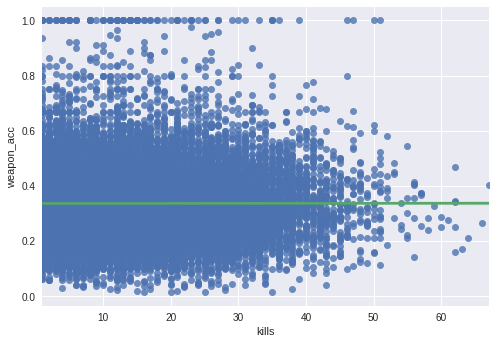

In [9]:
sns.regplot(x="kills", y="weapon_acc", data=df_kill_wpacc, line_kws={"color": "C1"})

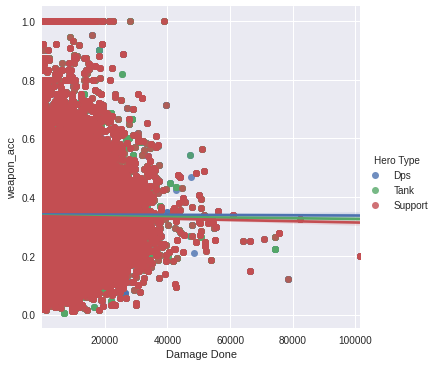

In [10]:
sns.lmplot( data=df_type_dmg_wpacc,
    x="Damage Done", y="weapon_acc", hue="Hero Type",
    height=5)

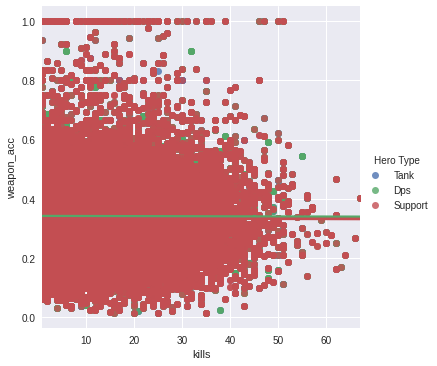

In [11]:
sns.lmplot( data=df_type_kill_wpacc,
    x="kills", y="weapon_acc", hue="Hero Type",
    height=5)

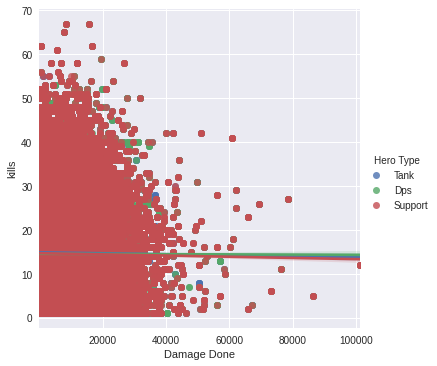

In [12]:
sns.lmplot( data=df_type_dmg_kill,
    x="Damage Done", y="kills", hue="Hero Type",
    height=5)

No difference in correlation between kills, elims, and weapon accuracy between hero types

In [20]:
asheStats = df[ashe]

In [21]:
_prim = df["stat_name"] == "Damage - Weapon"
_sec = df["stat_name"] == "Damage - Weapon Scoped"
_time = df["stat_name"] == "Time Played"
_dmg = df["stat_name"] == "All Damage Done"
df_ashe_stats = df[(_prim | _sec | _time | _dmg) & ashe]#["stat_amount"]
# prim_dmg = df[prim]['stat_amount'].astype(float)
# prim_dmg.name = 'Primary Damage'
# sec_dmg = asheStats[sec]['stat_amount'].astype(float)
# sec_dmg.name = 'Secondary Damage'
# test = pd.merge(prim_dmg,sec_dmg, left_index=True, right_index=True)
# test
#Cant use asheStats?
#pd.pivot_table(df_ashe_stats, index="player", columns="stat_name", values="stat_amount")
_idx_cols = df_ashe_stats.columns.drop(["stat_name", "stat_amount"])
_cols = "stat_name"
_values = "stat_amount"
df_ashe_stats = pd.pivot(df_ashe_stats, index=_idx_cols, columns=_cols, values=_values).reset_index()

In [22]:
_cols_to_fill = ["All Damage Done", "Damage - Weapon", "Damage - Weapon Scoped"]
df_ashe_stats[_cols_to_fill] = df_ashe_stats[_cols_to_fill].fillna(0)

In [23]:
# compute normalized damage amounts (normalized to time)
for i in _cols_to_fill:
    df_ashe_stats[i + "_normalized"] = df_ashe_stats.apply(
        lambda x: x[i] / x["Time Played"], axis="columns"
    )

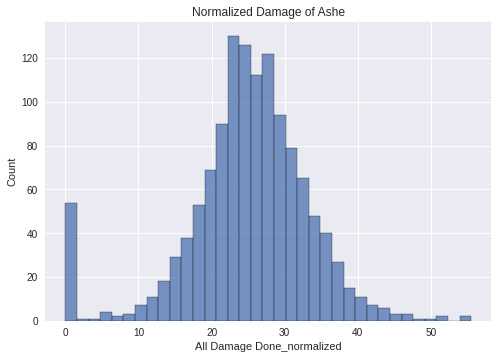

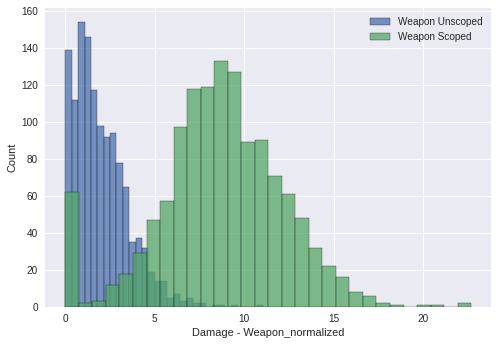

In [24]:
# set plots
sns.histplot(df_ashe_stats, x="All Damage Done_normalized")
plt.title("Normalized Damage of Ashe")

plt.figure()
sns.histplot(df_ashe_stats, x="Damage - Weapon_normalized", label="Weapon Unscoped")
sns.histplot(df_ashe_stats, x="Damage - Weapon Scoped_normalized", color="C1", label="Weapon Scoped")
plt.legend()

In [25]:
#asheSecondary = (asheStats['stat_name'] == 'Secondary Fire Accuracy')
#for i in range(52660):
   # if (asheStats['stat_name'].iloc[i] == 'Secondary Fire Accuracy'):
       # asheStats['stat_name'].iloc[i] = "Scoped Accuracy"
        #shows an error but works for some reason
        #Also I have no idea why I even made this in the first place


This is a work in progress

In [5]:
match_win = map_df[['match_winner']]
match_win = match_win[~match_win.index.duplicated(keep='first')]
df_match = df.set_index('match_id')
df_match_player = df[allHeros & timePlayed].set_index('match_id')
df_win = pd.merge(df_match_player, match_win, left_index=True, right_index=True)
df_complete = pd.merge(df_match, match_win, left_index=True, right_index=True)   

In [6]:
def win_lose(x,y):
    if (x == y):
        return 'win'
    else:
        return 'lose'
        
        
df_win["match_result"] = df_win[["team","match_winner"]].apply(lambda x : win_lose(*x), axis=1)
df_complete["match_result"] = df_complete[["team","match_winner"]].apply(lambda x : win_lose(*x), axis=1)


Map win dataframes

In [33]:
df_win_subs = df_win
df_win_subs.reset_index(inplace=True)
df_win_subs = df_win_subs[['player','match_result','match_id']].drop_duplicates(keep=False)
df_subs_final = df_win_subs.set_index('player').drop_duplicates(keep='first')
df_subs_final

,match_result,match_id
player,,
Xushu,lose,10224
Custa,lose,10225
Clockwork,lose,10227
Pine,win,10228
Agilities,win,10229
...,...,...
Jimmy,win,37253
Jihun,lose,37256
Farway1987,win,37381


In [32]:
df_subs_final['match_result'].value_counts()

win     319
lose    297
Name: match_result, dtype: int64